# Plotting and Visualization
Source code for this notebook from Chapter 9 
'Python for Data Analysis', by Wes McKinney

https://github.com/wesm/pydata-book/blob/2nd-edition/ch09.ipynb


Use '%matplotlib inline' magic function to direct the output of the executed cell.

there are essentially two ways to use Matplotlib:

    Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

    Rely on pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plotting.

https://matplotlib.org/stable/tutorials/introductory/usage.html



Definitions for Matplotlib 


**Figure** means the whole thing, basically everything mentioned below.


**Axes** is an Artist attached to a figure that contains a region for plotting data,
        2 or 3 Axis objects that create the ticks, tick labels and scales.
        set_title()
        set_xlabel()
        set_ylabel()
        

**Axis** Set the scale, limits and generate tick marks and tick labels. Location of ticks
        is determined by a Locator object, ticklabel strings are formatted by Formatter.
        

**Artist** Everything visible on the Figure is an Artist. When the figure is rendered, all 
        of the Artist are drawn to the **canvas**.
        
        
        
**Types of Inputs**  Non-numeric data will need to be converted before we can use most Numpy functions.

Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray. Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a numpy.matrix

b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

Most methods will also parse an addressable object like a dict, a numpy.recarray, or a pandas.DataFrame. Matplotlib allows you provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

In [7]:
%matplotlib inline

In [ ]:
#%matplotlib notebook  #possibly better option for interactive notebooks

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib as plt
#import matplotlib.pyplot as plt
print('Numpy version =======> ' , np.__version__)
print('Pandas version ======> ' , pd.__version__)
print('Matplotlib version ==> ' , mpl.__version__)

Numpy version =======>  1.19.2
Pandas version ======>  1.0.5
Matplotlib version ==>  3.2.2


In [9]:
import warnings
warnings.filterwarnings('ignore')
#https://stackoverflow.com/questions/48828824/disable-warnings-in-jupyter-notebook


In [ ]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 50
#np.random.seed(12345)   #set the seed if you want to share with your peers
import matplotlib.pyplot as plt
import matplotlib as mpl
#set the default sizes of the plots for each new cell in this notebook
plt.rc('figure', figsize=(20, 10))
np.set_printoptions(precision=4, suppress=True)

In [ ]:
pd.options.plotting.backend', 'plotly'

## Matplotlib API usage
Start with a very minimal plot

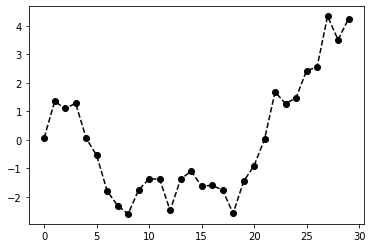

In [5]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

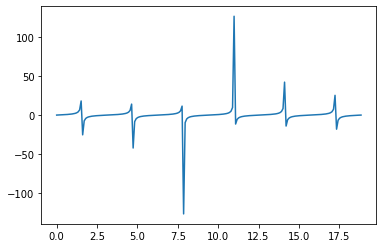

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

"""
#basic test to see if Python environment is setup properly
data = np.arange(27,990,3)
data
plt.plot(data)
"""

x = np.linspace(0, 6*np.pi, 200)
y = np.tan(x)

fig, ax = plt.subplots()
ax.plot(x, y)
fig.show()

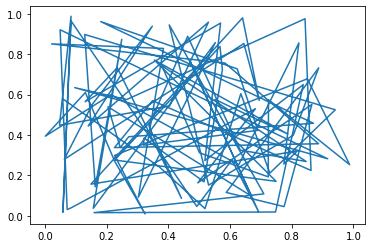

In [11]:
X = np.random.uniform(0, 1, 100)
Y = np.random.uniform(0, 1, 100)
ax.scatter(X, Y)

fig, ax = plt.subplots()
ax.plot(X, Y)
fig.show()

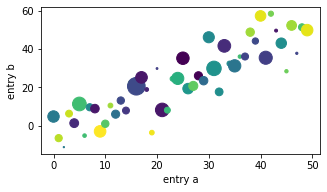

In [12]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7))#, layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')
fig.show()

#### Compare OO style and pyplot functions

There are two basic ways to use Matplotlib:

    Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

    Rely on pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plotting.


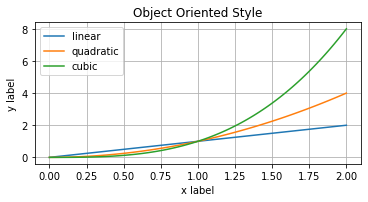

In [13]:
#Object oriented style
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), constrained_layout=True)
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Object Oriented Style")  # Add a title to the axes.
ax.legend();  # Add a legend.
ax.grid(True)

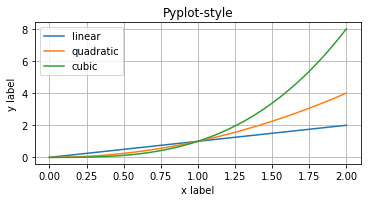

In [14]:
#Pyplot-style
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), constrained_layout=True)
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Pyplot-style")
plt.legend();
plt.grid(True)

### Figures and Subplots

The Figure object holds the plots in matplotlib
IPython will display with only next row


fig = plt.figure()  # an empty figure with no Axes


fig, ax = plt.subplots()  # a figure with a single Axes



fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes




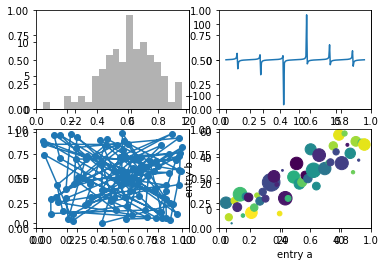

In [26]:
#fig = plt.figure() #create a new object with Figure

fig, axs = plt.subplots(2,2)

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#top left graph
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

#top right
x2 = np.linspace(0, 6*np.pi, 200)
y2 = np.tan(x2)
ax2.plot(x2,y2)

#bottom left
x3 = np.random.uniform(0, 1, 100)
y3 = np.random.uniform(0, 1, 100)
ax3.scatter(x3, y3)
ax3.plot(x3, y3)

#bottom right
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
ax4.scatter('a', 'b', c='c', s='d', data=data)
ax4.set_xlabel('entry a')
ax4.set_ylabel('entry b')

fig.show()

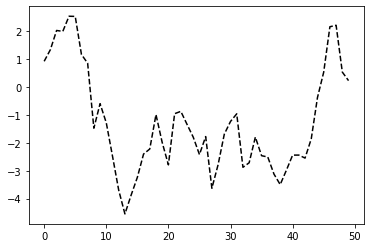

In [27]:
plt.plot(np.random.randn(50).cumsum(), 'k--') #black dashed line

In [ ]:
fig = plt.figure() #create a new object with Figure

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(70), np.arange(70) + 3 * np.random.randn(70))
ax3 

#Jupyter requires extra commands
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
#ax4 = fig.add_subplot(2, 2, 4)

fig.show()

In [ ]:
plt.close('all')

#### Multiple Figures and Axes

In [ ]:


fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], constrained_layout=True)
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

fig.show()

In [ ]:
G = gridspec()

In [ ]:
fig, axs = plt.subplots(2, 2)
axs.plot([1, 2, 3, 4], [1, 4, 2, 3])

https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

In [ ]:
plt.close('all')

In [30]:
import numpy as np
import matplotlib.pyplot as plt

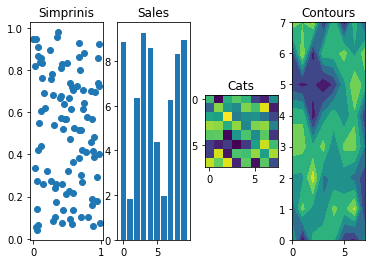

In [31]:
#simulate some measurements of the behavior of a tiny flying animal
ftime = np.random.uniform(0, 1, 100)
fdist = np.random.uniform(0, 1, 100)

reg_1 = np.arange(10)
reg_sales = np.random.uniform(1, 10, 10)
#fake water flood levels in height and volume, e.g.
#meters in height above spillway 
#volumne is cubic meters
#w_fh = np.arange(10)
#w_fv = np.random.uniform(1, 10, 10)

cats = np.random.uniform(0, 1, (8,8))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)

ax1.scatter(ftime, fdist)
ax2.bar(reg_1, reg_sales)
ax3.imshow(cats)
ax4.contourf(cats)


#set titles for each
fig.suptitle(None)
ax1.set_title("Simprinis")
ax2.set_title("Sales")
ax3.set_title("Cats")
ax4.set_title("Contours")
fig.show()

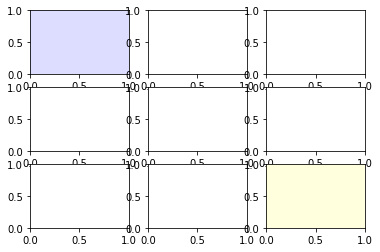

In [32]:
fig, axs = plt.subplots(3,3)
axs[0,0].set_facecolor('#ddddff')
axs[2,2].set_facecolor('#ffffdd')

In [33]:
gs = fig.add_gridspec(3, 3)
ax = fig.add_subplot(gs[0, :])
ax.set_facecolor('#ddddff')

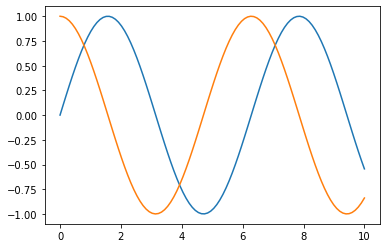

In [34]:
#two graphs on the same figure
X = np.linspace(0, 10, 100)
Y1, Y2 = np.sin(X), np.cos(X)

fig, ax = plt.subplots()
ax.plot(X, Y1, X, Y2)
ax.legend
fig.show()

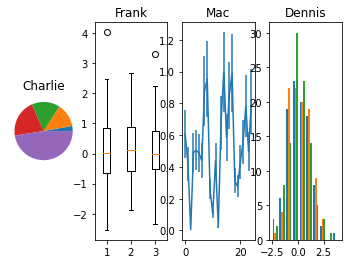

In [35]:
#z_23 = np.random.uniform(0, 1, 4)

z_23 = [12, 55, 66, 88, 200]
zz_24 = np.random.normal(0, 1, (100, 3))

er_x = np.arange(25)
er_y = np.random.uniform(0, 1, 25)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
#Change the orientation to 
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)

ax1.pie(z_23)
ax2.boxplot(zz_24)
ax3.errorbar(er_x, er_y, er_y/4)
ax4.hist(zz_24)

fig.suptitle(None)
ax1.set_title("Charlie")
ax2.set_title("Frank")
ax3.set_title("Mac")
ax4.set_title("Dennis")

fig.show()
#fig.savefig("Paddys_ranking_system_Jan2022.pdf")
#fig.savefig("Paddys_ranking_system_Jan2022.png", dpi=300)

Text(0.25, 3, 'The lines touch here')

<Figure size 432x288 with 0 Axes>

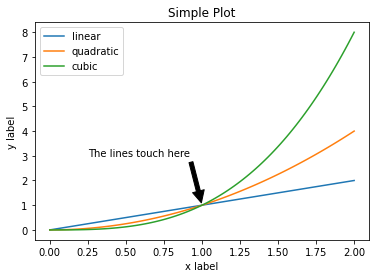

In [36]:
fig = plt.figure() #create a new object with Figure

x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.annotate('The lines touch here', xy=(1, 1), xytext=(0.25, 3),
             arrowprops=dict(facecolor='black', shrink=0.05))


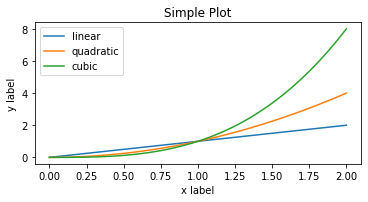

In [37]:
#pyplot-style
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), constrained_layout=True)
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

In [38]:
def mt_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

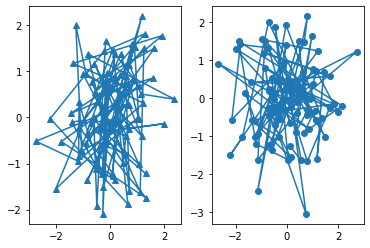

In [39]:
data1, data2, data3, data4 = np.random.randn(4, 100)
#fig, ax = plt.subplots(1, 1)
#mt_plotter(ax, data1, data2, {'marker': 'x'})
fig, (ax1, ax2) = plt.subplots(1, 2)
mt_plotter(ax1, data1, data2, {'marker': '^'})
mt_plotter(ax2, data3, data4, {'marker': 'o'})

In [ ]:
!conda install -c conda-forge ipywidgets -y

In [40]:
import ipywidgets as widgets
from ipywidgets import IntSlider
widgets.__version__

'7.5.1'

In [42]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
!jupyter lab path

In [44]:
widgets.IntSlider()
IntSlider()

IntSlider(value=0)

In [45]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [46]:
def f(x):
    return x

In [47]:
interact(f, x=11);

11

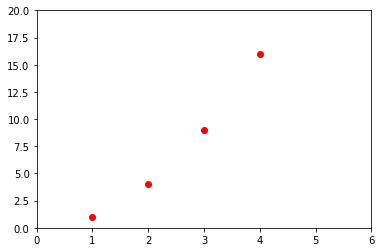

In [48]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])  #[xmin, xmax, ymin, ymax]
plt.show()

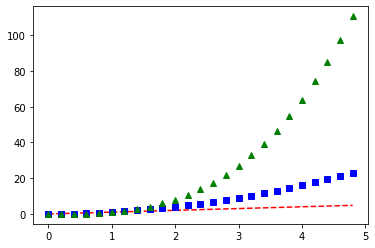

In [49]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

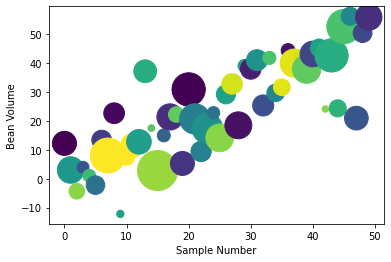

In [50]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 603

#x, y, s='marker size in points**2', c=colors
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('Sample Number')
plt.ylabel('Bean Volume')
plt.show()

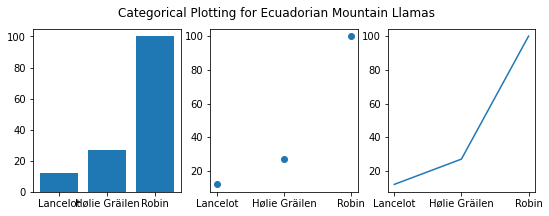

In [51]:
knights = ['Lancelot', 'Hølie Gräilen', 'Robin']
arrows = [12, 27, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(knights, arrows)
plt.subplot(132)
plt.scatter(knights, arrows)
plt.subplot(133)
plt.plot(knights, arrows)
plt.suptitle('Categorical Plotting for Ecuadorian Mountain Llamas')
plt.show()

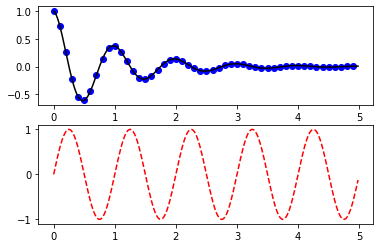

In [52]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure('semprini')
plt.subplot(211) #rows, cols, where
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.sin(2*np.pi*t2), 'r--')
plt.show()


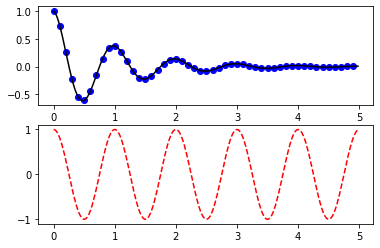

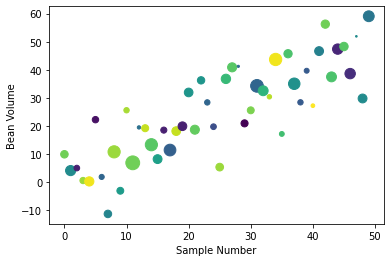

Text(0.5, 1.0, 'Crelm Toothpaste Sales 3rd Quarter')

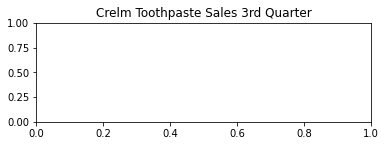

In [53]:
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

 # the first figure
plt.figure('PrimoFirst') # the first subplot in the first figure
plt.subplot(211) #rows, cols, where
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212) # the second subplot in the first figure
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


plt.figure('DeuciemSecond')                # a second figure
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 69

#x, y, s='marker size in points**2', c=colors
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('Sample Number')
plt.ylabel('Bean Volume')
plt.show()


plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Crelm Toothpaste Sales 3rd Quarter') # subplot 211 title

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#names = ["sample", "day", "bean_vol", "bean_mg", "fiber_alpha", "fiber_beta", "terpene1", "terpene2"]
bean_data = pd.read_csv('../data/raw/bean_data_2021.csv', header=0)

In [ ]:
bean_data.head()

In [ ]:
bean_data.keys()

#### Adjusting the spacing around subplots

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
ax.set_title("Just some random numbers")        
plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles
Define the x versus y coordinates and display green dashes


In [ ]:
x = [2,5,8,5,23,77]
y = [0,2,4,6,8,12]
fig = plt.figure
ax5 = fig.add_subplot(1,1,1)
ax5.plot(x, y, 'g--')

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)

In [ ]:
data1, data2 = np.random.randn(2, 100)

fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

#### Set face and edge colors

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

#### Linewidths, linestyles, and markersizes


Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines.

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see markers), or users can define their own MarkerStyle (see Marker reference):

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

In [ ]:
ax.plot(x, y, linestyle='--', color='g')

In [ ]:
plt.figure()

In [ ]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [ ]:
plt.close('all')

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

Professional graphs and visualizations have everything labeled.   A basic bar graph may only need a few ticks, a complex scatter chart may need a lot.

There are two majors ways to control the displays. These will work on the active or last cell that is activated, you may need to change the magic function %matplotlib to control where the graph refreshes.

Use the matplotlib.pyplot which is procedural based and designed for interactive use. A few methods can called easily.
xlim,
xticks
xticklabels

Without arguments it returns current x-axis value. 
Set the x axis range explictly with a list:
        plt.xlim([0, 10])
        
        
        
        
The two relevant classes are Locators and Formatters. Locators determine where the ticks are, and formatters control the formatting of tick labels.

Minor ticks are off by default (using NullLocator and NullFormatter). Minor ticks can be turned on without labels by setting the minor locator. Minor tick labels can be turned on by setting the minor formatter.

MultipleLocator places ticks on multiples of some base. FormatStrFormatter uses a format string (e.g., '%d' or '%1.2f' or '%1.1f cm' ) to format the tick labels.

pyplot.grid changes the grid settings of the major ticks of the y and y axis together. If you want to control the grid of the minor ticks for a given axis, use for example

'''python
ax.xaxis.grid(True, which='minor')
'''




#### Setting the title, axis labels, ticks, and ticklabels

Note that a given locator or formatter instance can only be used on a single axis
(because the locator stores references to the axis data and view limits).


[Text(0, 0.5, 'Total Semprinis'),
 Text(0.5, 0, 'Coconuts collected at each phase'),
 Text(0.5, 1.0, 'Setup labels etc with matplotlib plot')]

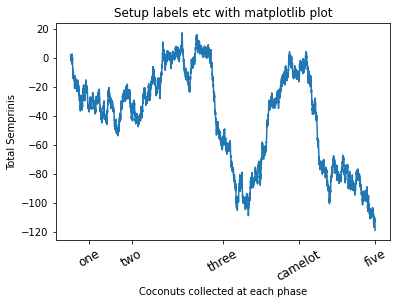

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(10000).cumsum())
ticks = ax.set_xticks([600, 2000, 5000, 7500, 10000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'camelot', 'five'],
                            rotation=30, fontsize='large')

props = {
    'title': 'Setup labels etc with matplotlib plot',
    'xlabel': 'Coconuts collected at each phase',
    'ylabel': 'Total Semprinis'
}
ax.set(**props)

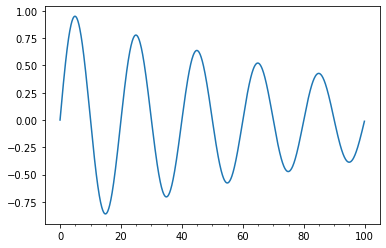

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


t = np.arange(0.0, 100.0, 0.1)
s = np.sin(0.1 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(5))

plt.show()



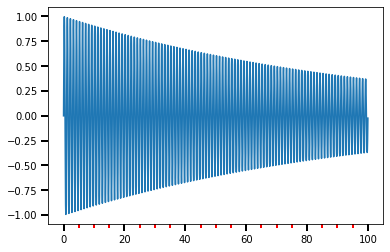

In [103]:
t = np.arange(0.0, 100.0, 0.01)
s = np.sin(2 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

plt.show()


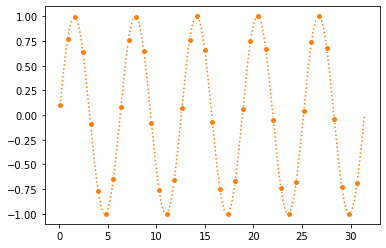

In [104]:
X = np.linspace(0.1, 10*np.pi, 1000)
Y = np.sin(X)

fig, ax = plt.subplots()

ax.plot(X, Y, 'C1o:', markevery=25, mec='1.0')

plt.show()

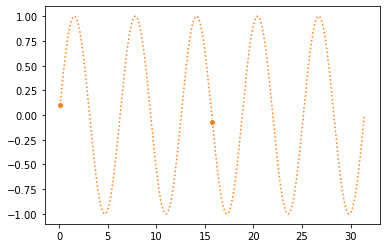

In [105]:
from matplotlib.ticker import MultipleLocator as ML
from matplotlib.ticker import ScalarFormatter as SF

fig, ax = plt.subplots()

ax.plot(X, Y, 'C1o:', markevery=500, mec='1.0')
ax.xaxis.set_minor_locator(ML(20))
ax.xaxis.set_minor_formatter(SF())
ax.tick_params(axis='x',which='minor',rotation=90)

plt.show()

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#import numpy as np
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#from matplotlib.ticker import MultipleLocator as ML
#from mpl.ticker import ScalarFormatter as SF

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#X = np.linspace(0, 2*np.pi, 100)
#X = np.linspace(0.1, 10*np.pi, 1000)

#Y = np.cos(X)

#fig, ax = plt.subplots()
#ax.plot(X, Y, color='green')


ax.xaxis.set_minor_locator(SF())
ax.xaxis.set_minor_formatter(SF())
ax.tick_params(axis='x', which='minor', rotation=90)

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#fig.savefig('semprini_plotTest_00.pdf')
fig.show()


#ax.xaxis.set_minor_locator(ML(0.2))
#ax.xaxis.set_minor_formatter(SF())
#ax.tick_params(axis='x', which='minor', rotation=90)

In [107]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

In [108]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 3.1999999999999993, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

#### Adding legends

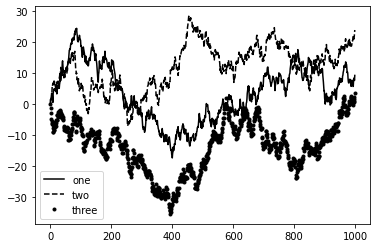

In [109]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

In [ ]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

In [ ]:
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('../data/raw/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [ ]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

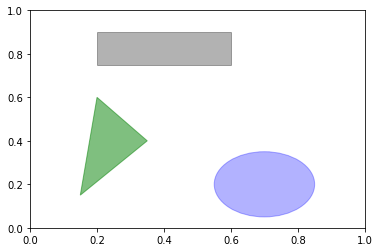

In [111]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

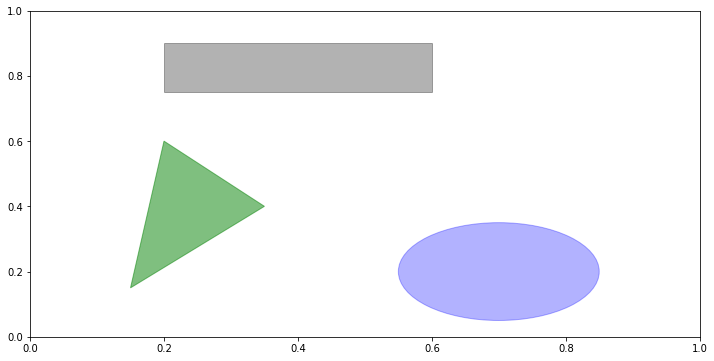

In [112]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Text annotation options



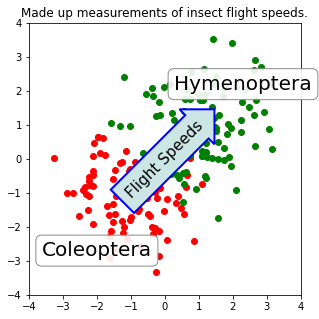

In [170]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect(1)

x1 = -1 + np.random.randn(100)
y1 = -1 + np.random.randn(100)
x2 = 1. + np.random.randn(100)
y2 = 1. + np.random.randn(100)

ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2.7, "Coleoptera", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2.3, 2.2, "Hymenoptera", ha="center", va="center", size=20,
        bbox=bbox_props)


bbox_props = dict(boxstyle="rarrow", fc=(0.8, 0.9, 0.9), ec="b", lw=2)
t = ax.text(0, 0, "Flight Speeds", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_title('Made up measurements of insect flight speeds.')

plt.show()

#### Annotation Arrow Styles

`~.Axes.annotate` draws an arrow connecting two points in an axes::

    ax.annotate("Annotation",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='offset points',
                )

This annotates a point at *xy* in the given coordinate (*xycoords*)
with the text at *xytext* given in *textcoords*. Often, the
annotated point is specified in the *data* coordinate and the annotating
text in *offset points*.
See `~.Axes.annotate` for available coordinate systems.

An arrow connecting *xy* to *xytext* can be optionally drawn by
specifying the *arrowprops* argument. To draw only an arrow, use
empty string as the first argument. ::

    ax.annotate("",
                xy=(0.2, 0.2), xycoords='data',
                xytext=(0.8, 0.8), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                )


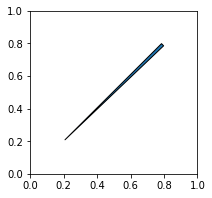

In [113]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(3, 3))

ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="wedge",   #fancy, wedge, simple, |-|
                            connectionstyle="arc3"),
            )

plt.show()

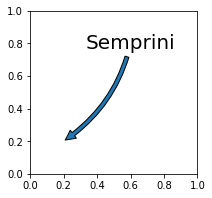

In [114]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(3, 3))

ax.annotate("Semprini",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.6, 0.8), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"),
            )

plt.show()

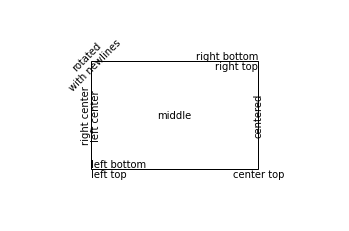

In [122]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
p = plt.Rectangle((left, bottom), width, height, fill=False)
p.set_transform(ax.transAxes)
p.set_clip_on(False)
ax.add_patch(p)

ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)

ax.text(left, 0.5 * (bottom + top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, 0.5 * (bottom + top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(0.5 * (left + right), 0.5 * (bottom + top), 'middle',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

ax.text(right, 0.5 * (bottom + top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes)

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes)

ax.set_axis_off()

plt.show()

## Charts

### Bar Charts

Data source :
Synopsis of the Phyla of Metazoa
Source: Zoology:: Dorit, Walker, Barnes
ISBN 0-03-030504-7	Chapter 23, pg 555

Pseudocoelomates

Animals in which the blastocoel sometimes persists, forming a body cavity. Digestive tract with mouth and anus. Body usually covered with a cuticle.


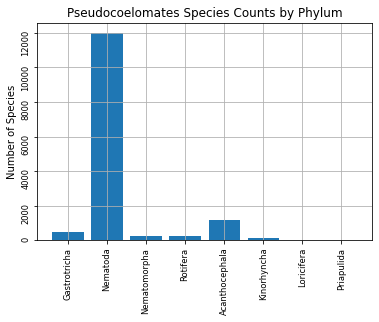

In [173]:
pseudocoelomates = ['Gastrotricha', 'Nematoda', 'Nematomorpha',  
                    'Rotifera', 'Acanthocephala', 'Kinorhyncha', 
                    'Loricifera', 'Priapulida']
spp_nums = [460, 12000, 230, 230, 1150, 100, 1, 13]

plt.bar(range(len(pseudocoelomates)), spp_nums)

plt.title("Pseudocoelomates Species Counts by Phylum")
plt.ylabel("Number of Species")

plt.xticks(range(len(pseudocoelomates)), pseudocoelomates)
plt.tick_params(labelrotation=90, labelsize='small')
plt.grid()
#this is an examples of a difficult to read display, there are too many nematods.
#the other 
plt.savefig('../data/processed/pseudocoelomates.png', dpi=400, bbox_inches='tight')

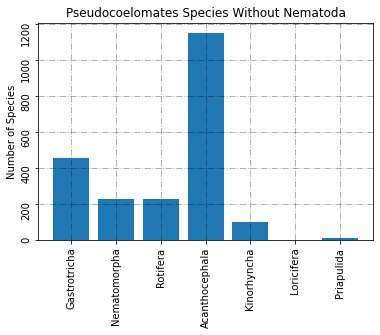

In [172]:
pseudocoelomates_no_nematoda = ['Gastrotricha', 'Nematomorpha',  
                    'Rotifera', 'Acanthocephala', 'Kinorhyncha', 
                    'Loricifera', 'Priapulida']
spp_nums = [460, 230, 230, 1150, 100, 1, 13]  #estimated numbers of taxonomic species

plt.bar(range(len(pseudocoelomates_no_nematoda)), spp_nums)

plt.title("Pseudocoelomates Species Without Nematoda")
plt.ylabel("Number of Species")

plt.xticks(range(len(pseudocoelomates_no_nematoda)), pseudocoelomates_no_nematoda)
plt.tick_params(labelrotation=90, labelsize='medium',
               grid_color='black', grid_linewidth=1, grid_linestyle='-.', #--dashed,:dotted, -solid,  
               grid_alpha=0.3)
plt.grid()
plt.savefig('../data/processed/pseudocoelomatesWOnematoda.png', dpi=400, bbox_inches='tight')

#### Pseudocoelomates: Outlier Example

Data from ISBN 0-03-030504-7, pg.555

The graphs look much better sorted by counts, stacked 
over each other and in a horizontal orientation. 

After experimenting with the layout in Jupyter notebook,
I create a regular Python app that should launch a new window with the data.

note_index = ZRS2ND

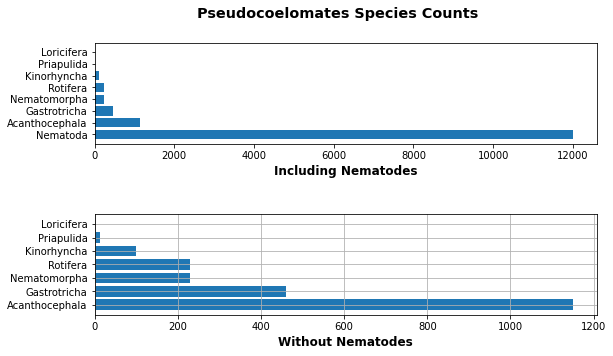

In [158]:
import matplotlib.pyplot as plt

pseudocoelomates_all = {'Nematoda': 12000, 'Acanthocephala': 1150, 
                      'Gastrotricha': 460, 'Nematomorpha': 230,
                      'Rotifera': 230, 'Kinorhyncha': 100, 
                      'Priapulida': 13, 'Loricifera': 1}
#create two lists from data dict
names_all = list(pseudocoelomates_all.keys())
values_all = list(pseudocoelomates_all.values())


pseudocoelomates_NO_nematoda = {'Acanthocephala': 1150, 'Gastrotricha': 460,
                                'Nematomorpha': 230, 'Rotifera': 230, 'Kinorhyncha': 100,
                                'Priapulida': 13, 'Loricifera': 1}

names_nn = list(pseudocoelomates_NO_nematoda.keys())    
values_nn = list(pseudocoelomates_NO_nematoda.values())


fig, axs = plt.subplots(2, 1, figsize=(9, 5))


axs[0].barh(names_all, values_all)
axs[0].set_xlabel('Including Nematodes', fontsize='large', fontweight='bold')

axs[1].barh(names_nn, values_nn)
axs[1].set_xlabel('Without Nematodes', fontsize='large', fontweight='bold')

plt.subplots_adjust(wspace=0, hspace=0.7)
fig.suptitle('Pseudocoelomates Species Counts', fontsize='x-large', fontweight='bold')

plt.grid()
plt.savefig('../data/processed/pseudocoelomates2graphs.png', dpi=400, bbox_inches='tight')

In [159]:
%%writefile ../apps/pseudocoelomates.py
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Synopsis of the Phyla of Metazoa
Source: Zoology:: Dorit, Walker, Barnes
ISBN 0-03-030504-7	Chapter 23, pg 555

Pseudocoelomates: Animals in which the blastocoel sometimes persists, 
                  forming a body cavity. 
                  Digestive tract with mouth and anus. 
                  Body usually covered with a cuticle.

Phylum Name (approx. number of species)

Phylum Gastrotricha (460)

Phylum Nematoda (12,000)

Phylum Nematomorpha (230)

Phylum Rotifera (230)

Phylum Acanthocephala (1,150)

Phylum Kinorhyncha (100)

Phylum Loricifera (1)

Phylum Priapulida (13)
"""

import matplotlib.pyplot as plt

pseudocoelomates_all = {'Nematoda': 12000, 'Acanthocephala': 1150, 
                      'Gastrotricha': 460, 'Nematomorpha': 230,
                      'Rotifera': 230, 'Kinorhyncha': 100, 
                      'Priapulida': 13, 'Loricifera': 1}
#create two lists from data dict
names_all = list(pseudocoelomates_all.keys())
values_all = list(pseudocoelomates_all.values())


pseudocoelomates_NO_nematoda = {'Acanthocephala': 1150, 'Gastrotricha': 460,
                                'Nematomorpha': 230, 'Rotifera': 230, 'Kinorhyncha': 100,
                                'Priapulida': 13, 'Loricifera': 1}

names_nn = list(pseudocoelomates_NO_nematoda.keys())    
values_nn = list(pseudocoelomates_NO_nematoda.values())


fig, axs = plt.subplots(2, 1, figsize=(9, 5))


axs[0].barh(names_all, values_all)
axs[0].set_xlabel('Including Nematodes', fontsize='large', fontweight='bold')

axs[1].barh(names_nn, values_nn)
axs[1].set_xlabel('Without Nematodes', fontsize='large', fontweight='bold')

plt.subplots_adjust(wspace=0, hspace=0.7)
fig.suptitle('Pseudocoelomates Species Counts', fontsize='x-large', fontweight='bold')

plt.grid()
plt.show()

Writing ../apps/pseudocoelomates.py


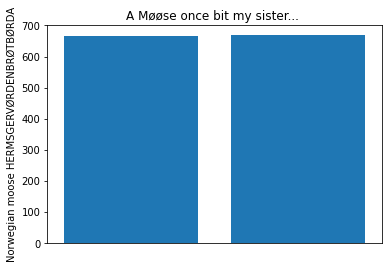

In [136]:
semprini = [666, 670]
years = [2022, 2023]
moose = ['Nordfink', 'IRKESTØM']
plt.bar(years, semprini, 0.8)
plt.xticks(years)
plt.ylabel("Norwegian moose HERMSGERVØRDENBRØTBØRDA")
#plt.xlabel(moose)
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
plt.xticks(range(len(semprini)), moose)
# misleading y-axis only shows the part above 500
#plt.axis([2021.5,2023.5, 665, 671])
plt.axis([2021.5,2023.5, 0, 700])
plt.title("A Møøse once bit my sister... ")

#plt.axis([2016.5, 2018.5, 0, 550])
#plt.title("Better representation of the data")

plt.show()


#### Graph bins of regression data 

In [89]:
df_1 = pd.read_csv('../data/raw/donations.csv', index_col=False, header=None);
donations = df_1[df_1.columns[0]]
#donations = df15.transpose()[0] # convert the DataFrame into a Series
donations.describe()

count     92844.000000
mean         90.709217
std         842.428973
min           0.000000
25%          25.000000
50%          50.000000
75%         100.000000
max      215000.000000
Name: 0, dtype: float64

In [70]:
bins1= [0, 100, 300, 500, 1000, 3000, 250000]
donor_tiers = ['lessThan$100', '$101to$300', '$301to$500', '$501to$1K', '$1Kto$3K', '$+3K']
donations_by_bins = pd.cut(donations, bins1, labels=donor_tiers)
donations_by_bins

0        lessThan$100
1        lessThan$100
2        lessThan$100
3        lessThan$100
4        lessThan$100
             ...     
92839    lessThan$100
92840    lessThan$100
92841    lessThan$100
92842    lessThan$100
92843      $301to$500
Name: 0, Length: 92844, dtype: category
Categories (6, object): [lessThan$100 < $101to$300 < $301to$500 < $501to$1K < $1Kto$3K < $+3K]

In [81]:
pd.value_counts(donations_by_bins, normalize=True)

lessThan$100    0.876760
$101to$300      0.093190
$301to$500      0.019474
$501to$1K       0.008283
$1Kto$3K        0.001702
$+3K            0.000592
Name: 0, dtype: float64

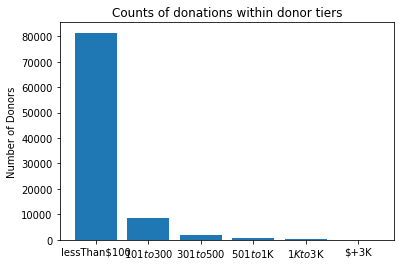

In [72]:
plt.bar(range(len(donor_tiers)), pd.value_counts(donations_by_bins))

plt.title("Counts of donations within donor tiers")
plt.ylabel("Number of Donors")

#label x-axis with list of user readable names of bins
plt.xticks(range(len(donor_tiers)), donor_tiers)

plt.show()

#### Examine smallest donors

In [82]:
df_small_donors = donations[~(donations > 101)]

In [86]:
small_d = pd.qcut(df_small_donors, 4)
pd.value_counts(small_d)

(20.0, 50.0]      35677
(-0.001, 20.0]    20547
(95.0, 101.0]     20303
(50.0, 95.0]       4900
Name: 0, dtype: int64

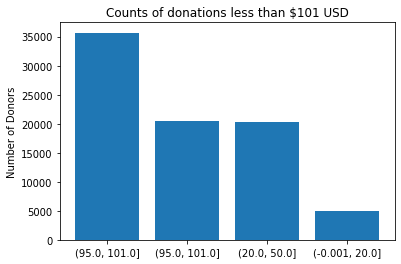

In [90]:
plt.bar(range(4), pd.value_counts(small_d))

plt.title("Counts of donations less than $101 USD")
plt.ylabel("Number of Donors")

#label x-axis with list of user readable names of bins
plt.xticks(range(4), small_d)

plt.show()

In [95]:
bins2= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
donor_sm_tier = ['lessThan$10', '$11to$20', '$21to$30', '$31to$40', '$41to$50', 
               '$51to$60', '$61to$70', '$71to$80', '$81to$90', '$91to$101']
small_donors_by_bins = pd.cut(df_small_donors, bins2, labels=donor_sm_tier)
small_donors_by_bins

0          $91to$101
1          $91to$101
2           $21to$30
3        lessThan$10
4           $11to$20
            ...     
92838       $21to$30
92839      $91to$101
92840      $91to$101
92841       $31to$40
92842       $41to$50
Name: 0, Length: 81427, dtype: category
Categories (10, object): [lessThan$10 < $11to$20 < $21to$30 < $31to$40 ... $61to$70 < $71to$80 < $81to$90 < $91to$101]

In [96]:
pd.value_counts(small_donors_by_bins, normalize=True)

$91to$101      0.251836
$41to$50       0.227851
$11to$20       0.163363
$21to$30       0.161054
lessThan$10    0.088964
$31to$40       0.049247
$71to$80       0.037298
$51to$60       0.007258
$81to$90       0.007160
$61to$70       0.005969
Name: 0, dtype: float64

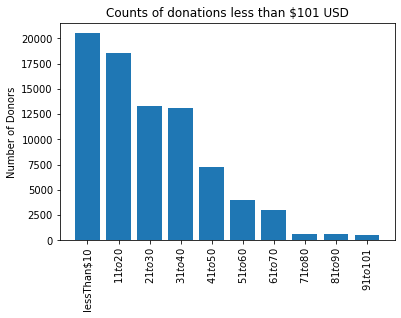

In [100]:
plt.bar(range(len(donor_sm_tier)), pd.value_counts(small_donors_by_bins))

plt.title("Counts of donations less than $101 USD")
plt.ylabel("Number of Donors")

#label x-axis with list of user readable names of bins
plt.xticks(range(len(donor_sm_tier)), donor_sm_tier, rotation=90)

plt.show()

#### Compare Bees and Wasps Superfamilies

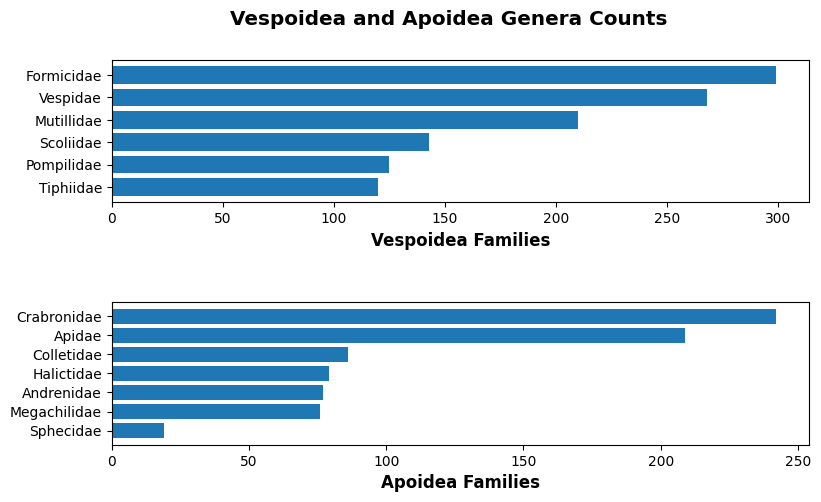

In [3]:
import matplotlib.pyplot as plt

#Genera and species data from 2012 "Order Hymenoptera" by Aguiar et al, Zootaxa 3703 (1): 051-062
#ISSN 1175-5334
#https://www.mapress.com/zootaxa/2013/f/zt03703p062.pdf



#organize data into a dictionary
vespoidea_genera = {'Tiphiidae': 120, 'Pompilidae': 125,
                    'Scoliidae': 143, 'Mutillidae': 210,
                    'Vespidae': 268, 'Formicidae': 299}


names_vespoidea = list(vespoidea_genera.keys())
values_vespoidea = list(vespoidea_genera.values())


apoidea_genera = {'Sphecidae': 19, 'Megachilidae': 76,
                  'Andrenidae': 77, 'Halictidae': 79,
                  'Colletidae': 86, 'Apidae': 209,
                  'Crabronidae': 242}
            

names_apoidea = list(apoidea_genera.keys())
values_apoidea = list(apoidea_genera.values())

#set display parameters
fig, axs = plt.subplots(2, 1, figsize=(9, 5))

axs[0].barh(names_vespoidea, values_vespoidea)
axs[0].set_xlabel('Vespoidea Families', fontsize='large', fontweight='bold')

axs[1].barh(names_apoidea, values_apoidea)
axs[1].set_xlabel('Apoidea Families', fontsize='large', fontweight='bold')

plt.subplots_adjust(wspace=0, hspace=0.7)
fig.suptitle('Vespoidea and Apoidea Genera Counts', fontsize='x-large', fontweight='bold')

#display graph
#plt.grid()
#save graph to a file
plt.savefig('../data/processed/vespoideaApoideaGenera.png', dpi=400, bbox_inches='tight')

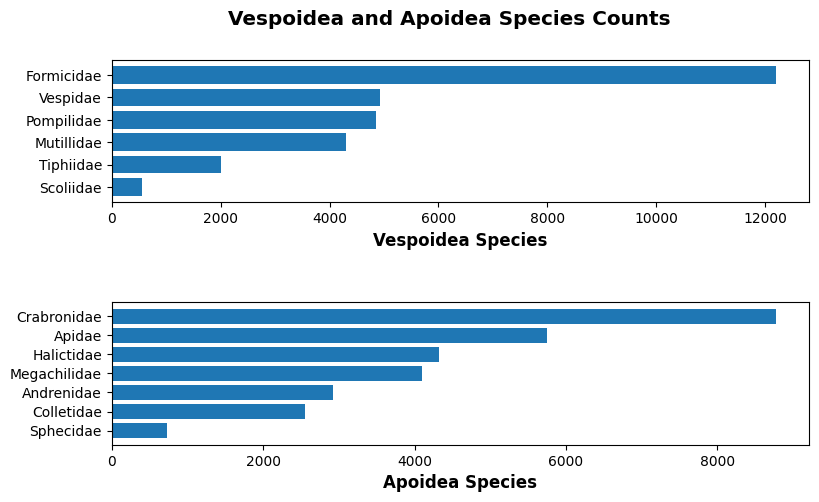

In [2]:
import matplotlib.pyplot as plt

#Genera and species data from 2012 "Order Hymenoptera" by Aguiar et al, Zootaxa 3703 (1): 051-062
#ISSN 1175-5334
#https://www.mapress.com/zootaxa/2013/f/zt03703p062.pdf



#organize data into a dictionary
vespoidea_species = {'Scoliidae': 560, 'Tiphiidae': 2000,
                     'Mutillidae': 4302, 'Pompilidae': 4855,
                     'Vespidae': 4932, 'Formicidae': 12199}


names_vespoidea = list(vespoidea_species.keys())
values_vespoidea = list(vespoidea_species.values())


apoidea_species = {'Sphecidae': 724, 'Colletidae': 2547,
                   'Andrenidae': 2917, 'Megachilidae': 4096,
                   'Halictidae': 4327, 'Apidae': 5749,
                   'Crabronidae': 8773}

            

names_apoidea = list(apoidea_species.keys())
values_apoidea = list(apoidea_species.values())

#set display parameters
fig, axs = plt.subplots(2, 1, figsize=(9, 5))

axs[0].barh(names_vespoidea, values_vespoidea)
axs[0].set_xlabel('Vespoidea Species', fontsize='large', fontweight='bold')

axs[1].barh(names_apoidea, values_apoidea)
axs[1].set_xlabel('Apoidea Species', fontsize='large', fontweight='bold')

plt.subplots_adjust(wspace=0, hspace=0.7)
fig.suptitle('Vespoidea and Apoidea Species Counts', fontsize='x-large', fontweight='bold')

#display graph
#plt.grid()
#save graph to a file
plt.savefig('../data/processed/vespoideaApoideaSpecies.png', dpi=400, bbox_inches='tight')

### Line Charts

Use plt.show() or savefig at the end.



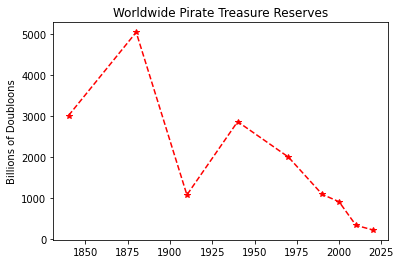

In [73]:
from matplotlib import pyplot as plt

years = [1840, 1880, 1910, 1940, 1970, 1990, 2000, 2010, 2020]
treasure = [3010.8, 5042.1, 1075.9, 2862.5, 1999.6, 1089.6, 908.5, 333.3, 222.0]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, treasure, color='red', marker='*', linestyle='--')

# add a title
plt.title("Worldwide Pirate Treasure Reserves")

# add a label to the y-axis
plt.ylabel("Billions of Doubloons")
plt.show()

#### Multiple series on the same chart

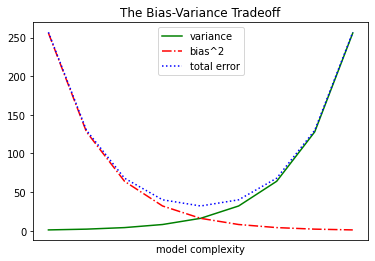

In [74]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error  = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

In [ ]:
import matplotlib as mpl

from matplotlib.ticker import MultipleLocator as ML
from matplotlib.ticker import ScalarFormatter as SF


x = np.linspace(0.1, 10*np.pi, 1000)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, "C1o:", markevery=25, mec="1.0")
ax.fill_betweenx([-1,1], [0], [2*np.pi])
ax.text(0, -1, r" Period $\Phi$")

ax.xaxis.set_minor_locator(ML(1))
ax.tick_params(axis='x', which='minor', rotation=90)


fig.show()

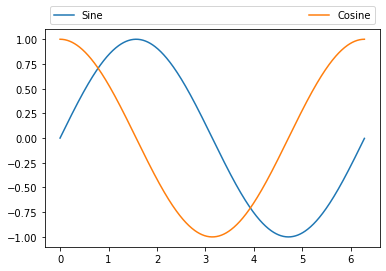

In [75]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x), "C0", label="Sine")
ax.plot(x, np.cos(x), "C1", label="Cosine")
ax.legend(bbox_to_anchor=(0,1,1, .1), ncol=2,
          mode="expand", loc="lower left")

fig.show()

In [ ]:
X = np.arange(650,1500,50)

### Scatterplots

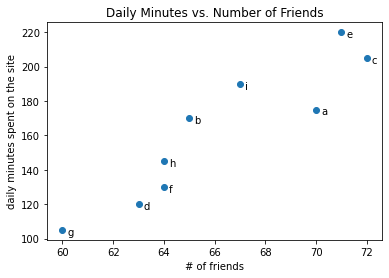

In [76]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

#### Log Scale on 2 axes


https://matplotlib.org/stable/gallery/scales/aspect_loglog.html


class matplotlib.scale.LogScale(axis, *, base=10, subs=None, nonpositive='clip')[source]
Bases: ScaleBase
A standard logarithmic scale. Care is taken to only plot positive values.
Parameters:

axisAxis
        The axis for the scale.

basefloat, default: 10
        The base of the logarithm.

nonpositive{'clip', 'mask'}, default: 'clip'
Determines the behavior for non-positive values. They can either be masked as invalid, or clipped to a very small positive number.

subssequence of int, default: None
        Where to place the subticks between each major tick. For example, in a log10 scale,will place 8 logarithmically spaced minor ticks between each major tick.

property base

get_transform()[source]
    Return the LogTransform associated with this scale.

limit_range_for_scale(vmin, vmax, minpos)[source]
    Limit the domain to positive values.

name = 'log'

set_default_locators_and_formatters(axis)[source]

    Set the locators and formatters of axis to instances suitable for this scale.




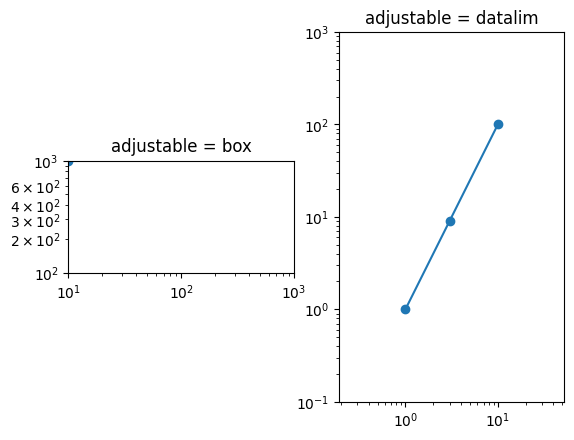

In [3]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(1e1, 1e3)
ax1.set_ylim(1e2, 1e3)
ax1.plot([1, 3, 10], [1, 9, 1000], "o-")
ax1.set_aspect(1)
ax1.set_title("adjustable = box")

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_adjustable("datalim")
ax2.plot([1, 3, 10], [1, 9, 100], "o-")
ax2.set_xlim(1e-1, 1e2)
ax2.set_ylim(1e-1, 1e3)
ax2.set_aspect(1)
ax2.set_title("adjustable = datalim")

plt.show()



In [ ]:
X = 

### Histograms

            a         b         c
0    0.213514 -0.161799  0.391175
1    0.495677  0.177461 -2.958115
2    1.229094  0.942188 -3.072483
3    2.186489  1.192650 -2.327433
4    2.521857  0.771361 -1.975027
..        ...       ...       ...
995  2.222145 -1.741729 -2.062064
996 -1.846584 -1.917937 -0.668750
997 -0.495742  1.569179 -0.878227
998 -0.589324 -0.103719  0.123923
999 -0.422678 -0.339691 -1.210438

[1000 rows x 3 columns]


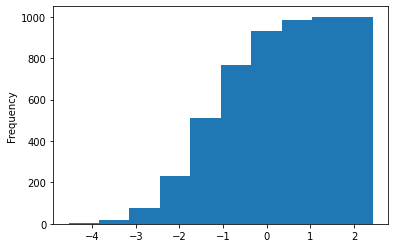

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df4 = pd.DataFrame({'a': np.random.randn(1000) + 1,
                    'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1},
                    columns=['a', 'b', 'c'])
print(df4)
plt.figure();
#df4['a'].plot.hist(orientation='horizontal', cumulative=True)
df4['c'].plot.hist(orientation='vertical', cumulative=True)
plt.show()

In [78]:
print(df4.diff())

            a         b         c
0         NaN       NaN       NaN
1    0.282163  0.339260 -3.349290
2    0.733417  0.764726 -0.114368
3    0.957395  0.250463  0.745051
4    0.335368 -0.421289  0.352405
..        ...       ...       ...
995  2.014858 -2.135464 -0.612165
996 -4.068729 -0.176208  1.393314
997  1.350841  3.487116 -0.209477
998 -0.093581 -1.672898  1.002150
999  0.166646 -0.235973 -1.334361

[1000 rows x 3 columns]


<Figure size 432x288 with 0 Axes>

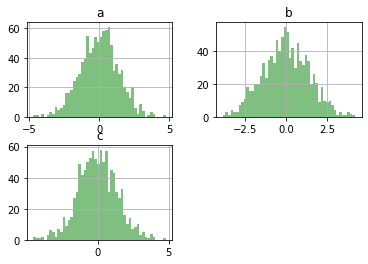

In [79]:
plt.figure()
df4.diff().hist(color='g', alpha=0.5, bins=50)
plt.show()

### Box Plots

Create a dictionary to manage the color options 

          A         B         C         D         E
0  0.486786  0.454615  0.288891  0.165448  0.794802
1  0.706310  0.847637  0.439434  0.460180  0.432364
2  0.072389  0.875547  0.945560  0.130647  0.983128
3  0.230875  0.777392  0.411413  0.566232  0.051952
4  0.564053  0.871710  0.329724  0.291548  0.521986
5  0.700335  0.077939  0.797260  0.249352  0.220014
6  0.711347  0.870349  0.220581  0.704177  0.232144
7  0.767946  0.514180  0.143101  0.767895  0.334902
8  0.525954  0.964448  0.227228  0.987135  0.554382
9  0.024796  0.826336  0.639036  0.597714  0.667790


<Figure size 432x288 with 0 Axes>

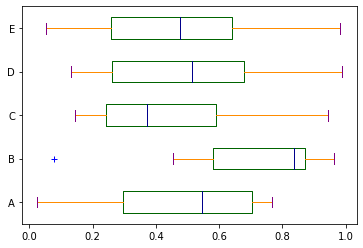

In [80]:
df5 = pd.DataFrame(np.random.rand(10, 5),
columns=['A', 'B', 'C', 'D', 'E'])
print(df5)

color = dict(boxes='DarkGreen',
            whiskers='DarkOrange',
            medians='DarkBlue',
            caps='Purple')

# YDraw box plots 
plt.figure()
df5.plot.box(color=color, sym='b+',   #blue plus sign
            vert=False, positions=[1, 2, 3, 4 , 5])
plt.show()

In [ ]:
print("Plot color settings:   " + str(color))

In [ ]:
df6 = pd.DataFrame(np.random.rand(13,6))
print(df6)

plt.figure()
boxplot1 = df6.boxplot()
plt.show()

In [ ]:
df7 = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'] )
df7['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
print(df7)
# Let’s create column-wise visualizations as follows:
plt.figure();
bp = df7.boxplot(by='X')
plt.show()

In [ ]:
df8 = pd.DataFrame(np.random.rand(13,3), columns=['Test01', 'Test02', 'Test03'])

df8['X'] = pd.Series(['M','M','M','M','M','M','M','T','T','T','T','T','T'])
df8['Y'] = pd.Series(['M','T','M','T','M','T','M','T','M','T','M','T','M',])

print(df8)

#print("Data types of df8 =  :", df8.dtypes)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(10,3), columns=["Col1", "Col2", "Col3"])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
print(df)
# You can create box plots in groups of multiple columns (this means the
# grouping criteria will have multiple columns).
plt.figure();
bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])
plt.show()

In [ ]:
#import warnings
#warnings.simplefilter(action='ignore', category=VisibleDeprecationWarning)

#convert categorical to binary

# You can create box plots in groups of multiple columns (this means the
# grouping criteria will have multiple columns).
plt.figure();
bp = df8.boxplot(column=['Test01','Test02'], by=['X'])
plt.show()

In [ ]:
df8.dtypes

In [ ]:
np.random.seed(1234)

#dtypes1 = {'A' : np.float64, 'B' : np.float64, 'C' : np.object}

df_box1 = pd.DataFrame(np.random.randn(10, 2), columns=['A', 'B']) #, dtype=dtypes1)
df_box1['C'] = np.random.choice(['Yes', 'No'], size=10)
df_box1 = np.dtype(['C', np.object])



print(df_box)
# You can use the routine groupby() in Pandas to group the data and
# visualize it as follows:
plt.figure()
bp = df_box.boxplot(by='C',)
plt.show()

## Saving Plots to File

Basic usage of the plt.savefig method.  

Share your plots and control the output format, simply .  The example below will output the SVG 

plt.savefig('figpath.svg')

Set the resolution in dots-per-inch manually. Default is 100 

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')


fname, #filepath 

facecolor, edge color #default is white

format, the file format can be explictly expressed


from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

## Matplotlib Configuration

Matplotlib is built for professional publications, the rc method allows us to customize color schemes, fonts, grids, etc.

Modify the global parameters once you have an idea of the sizes you need. Much easier to view if they are on separate lines.

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

You can set your parameters to launch on startup by placing a file called '.matplotlibrc' in your home folder.  Check your /usr/share/matplotlib/mpl-data for templates to get you started.  
This may be important to add to your notebooks in multiplatform environments. 

https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline
You can also always start all your IPython kernels in inline mode by default by setting the following config options in your config files:

c.IPKernelApp.matplotlib=<CaselessStrEnum>
  Default: None
  Choices: ['auto', 'gtk', 'gtk3', 'inline', 'nbagg', 'notebook', 'osx', 'qt', 'qt4', 'qt5', 'tk', 'wx']
  Configure matplotlib for interactive use with the default matplotlib backend.



In [ ]:
#WIP

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## Filled Polygons


start_time = time.perf_counter()


end_time = time.perf_counter()

print(f'Took {end_time - start_time} seconds')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

In [ ]:
x, y = koch_snowflake(order=4)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

In [ ]:
start_time = time.perf_counter()

x, y = koch_snowflake(order=14)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

end_time = time.perf_counter()

print(f'Took {end_time - start_time} seconds')

In [ ]:
import numpy as np

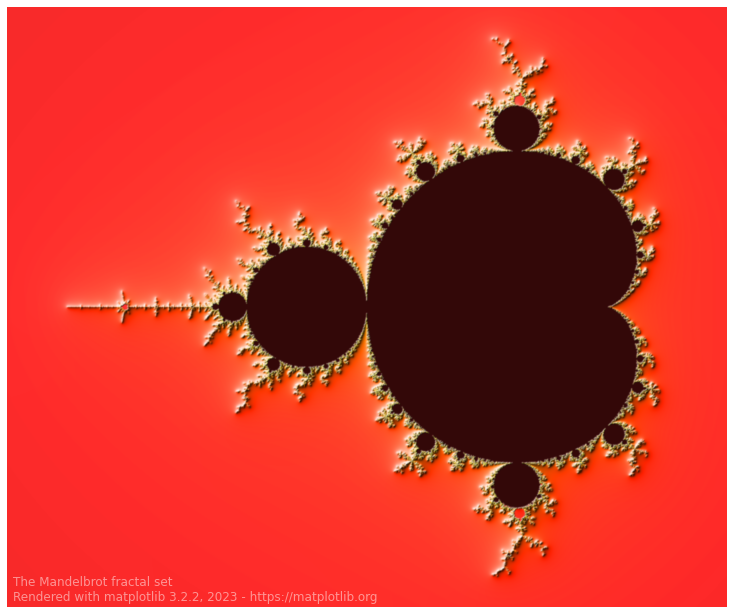

Took 12.207589185039978 seconds


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.perf_counter()

def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j    #originaly 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000 // 2
    ymin, ymax, yn = -1.25, +1.25, 2500 // 2
    maxiter = 200   #originally 200
    horizon = 2.0 ** 40
    log_horizon = np.log2(np.log(horizon))
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://web.archive.org/web/20160331171238/https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift?lang=en

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s, %s - https://matplotlib.org"
            % (matplotlib.__version__, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()
    


end_time = time.perf_counter()

print(f'Took {end_time - start_time} seconds')


## Animated Line Plot

https://matplotlib.org/stable/gallery/animation/simple_anim.html



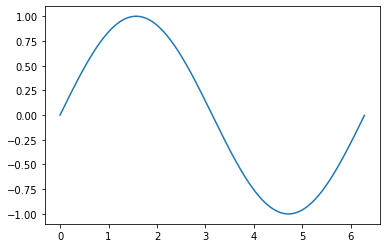

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [2]:
%matplotlib inline

## Barnsley's Fern


https://en.wikipedia.org/wiki/Barnsley_fern


Code source:

https://matplotlib.org/matplotblog/posts/unc-biol222/


/home/tap3w0rm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


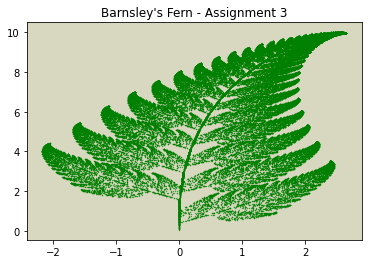

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Barnsley's Fern - Fractal; en.wikipedia.org/wiki/Barnsley_…


#functions for each part of fern:

#stem

def stem(x,y):
  return (0, 0.16*y)
#smaller leaflets

def smallLeaf(x,y):
  return (0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6)
#large left leaflets

def leftLarge(x,y):
  return (0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6)
#large right leftlets

def rightLarge(x,y):
  return (-0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44)
componentFunctions = [stem, smallLeaf, leftLarge, rightLarge]

# number of data points and frequencies for parts of fern generated:

#lists with all 75000 datapoints

datapoints = 75000
x, y = 0, 0
datapointsX = []
datapointsY = []
#For 75,000 datapoints

for n in range(datapoints):
  FrequencyFunction = np.random.choice(componentFunctions, p=[0.01, 0.85, 0.07, 0.07])
  x, y = FrequencyFunction(x,y)
  datapointsX.append(x)
  datapointsY.append(y)

#Scatter plot & scaled down to 0.1 to show more definition:

plt.scatter(datapointsX,datapointsY,s=0.1, color='g')
#Title of Figure

plt.title("Barnsley's Fern - Assignment 3")
#Changing background color

ax = plt.axes()
ax.set_facecolor("#d8d7bf")